## Preprocesssing Signal - Foundation

In [2]:
import librosa

data_path = 'GTZAN/genres_original/blues/blues.00000.wav'
data, sr = librosa.load(data_path)

In [18]:
import IPython.display as ipd

ipd.Audio(data, rate=sr)

### Waveform: A basic representation of the audio signal, showing how the amplitude varies over time

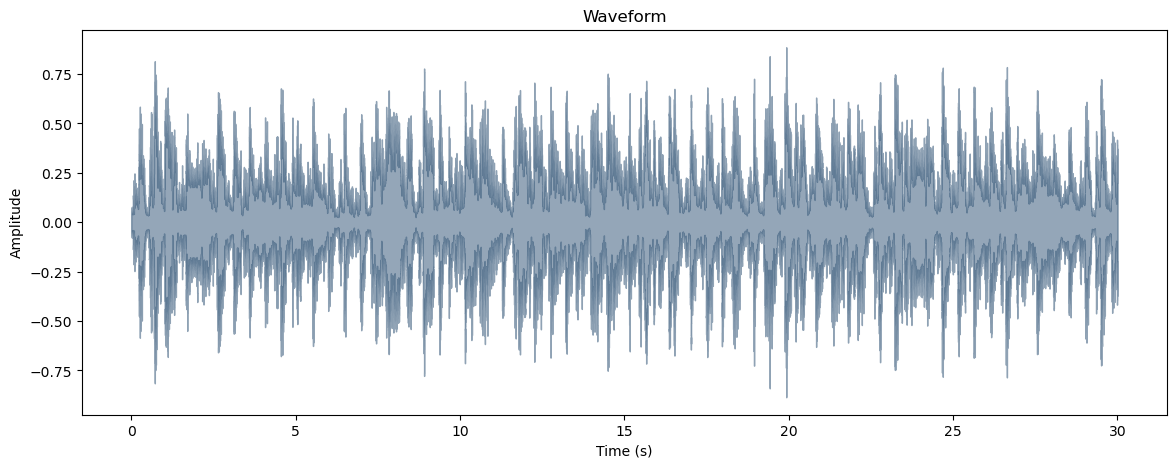

In [12]:
import matplotlib.pyplot as plt

# wave form of the audio
plt.figure(figsize=(14, 5))
librosa.display.waveshow(data, color ="#2B4F72", alpha=.5)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()

### Sampling Rate: number of sample taken per second

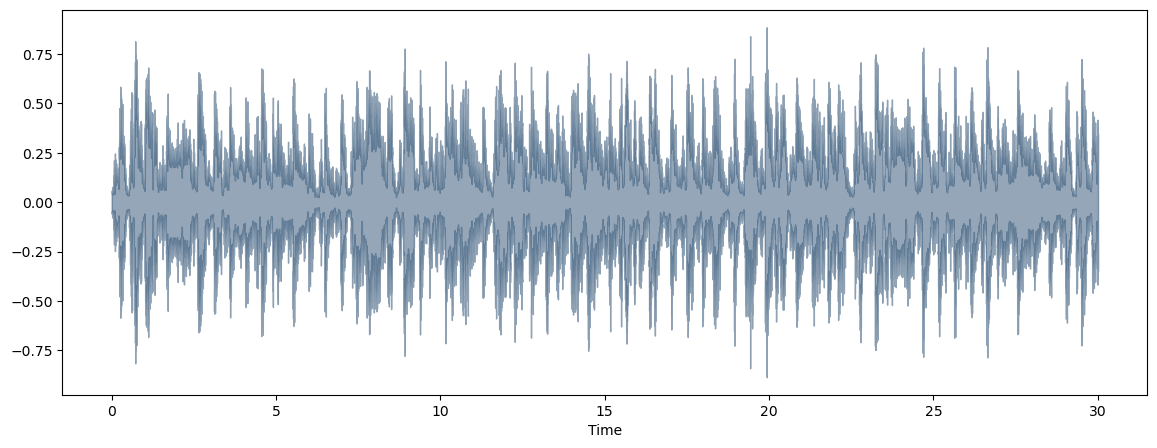

In [27]:
# Default sampling rate = 22050 Hz
data, sr = librosa.load(data_path)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(data, color ="#2B4F72", alpha=.5)

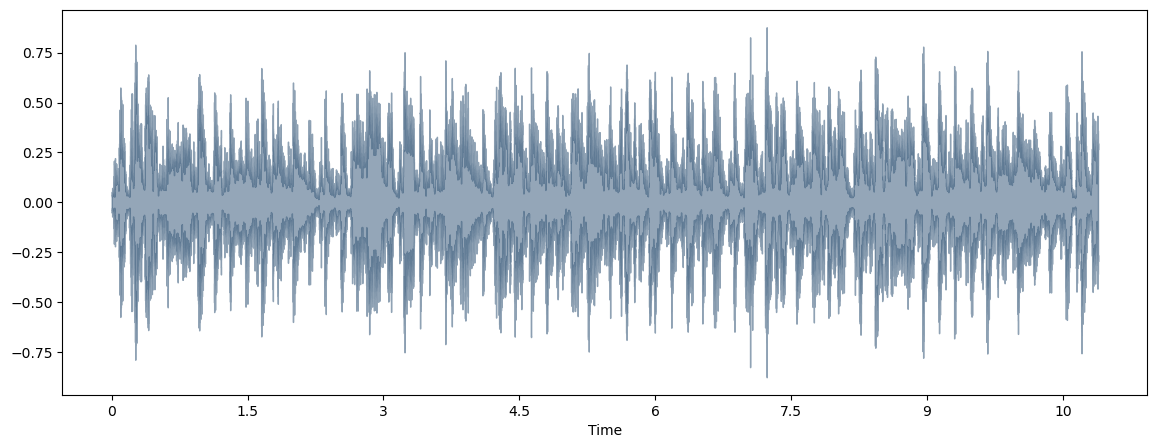

In [28]:
# Sampling rate = 8000 Hz
data, sr = librosa.load(data_path, sr=8000)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(data, color ="#2B4F72", alpha=.5)
plt.show()

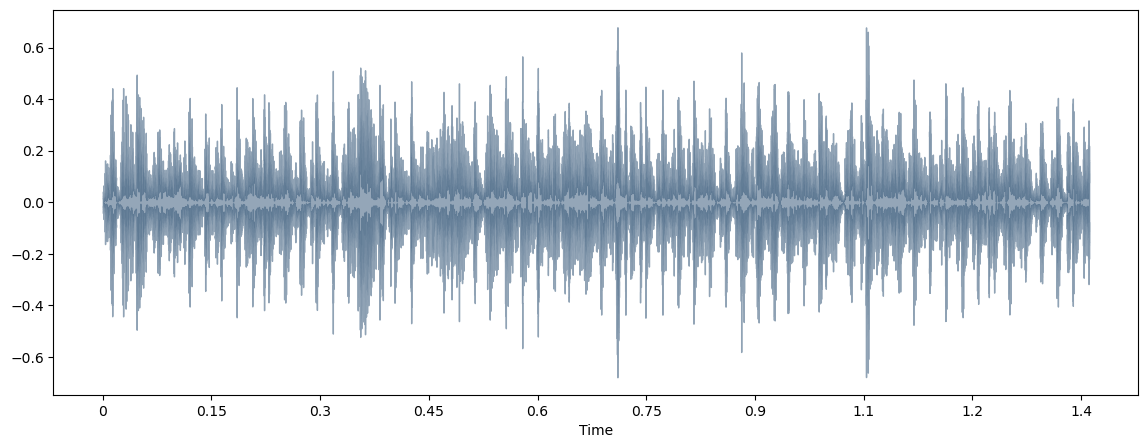

In [29]:
# Sampling rate = 1000 Hz
data, sr = librosa.load(data_path, sr=1000)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(data, color ="#2B4F72", alpha=.5)
plt.show()

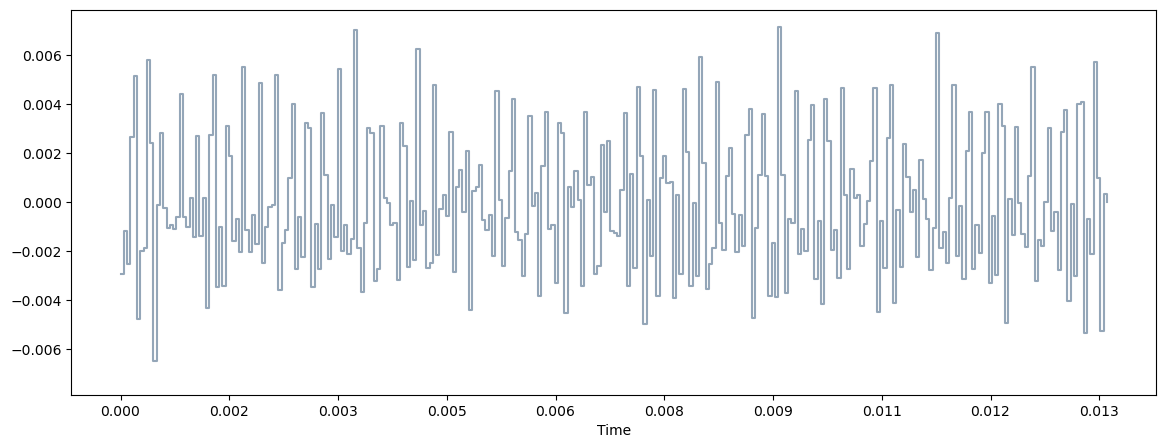

In [30]:
# Sampling rate = 10 Hz
data, sr = librosa.load(data_path, sr=10)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(data, color ="#2B4F72", alpha=.5)
plt.show()

### Spectrogram: A visual representation of how the frequencies in a signal change over time. This helps in identifying patterns, especially in tasks like speech or music or gender voice classification

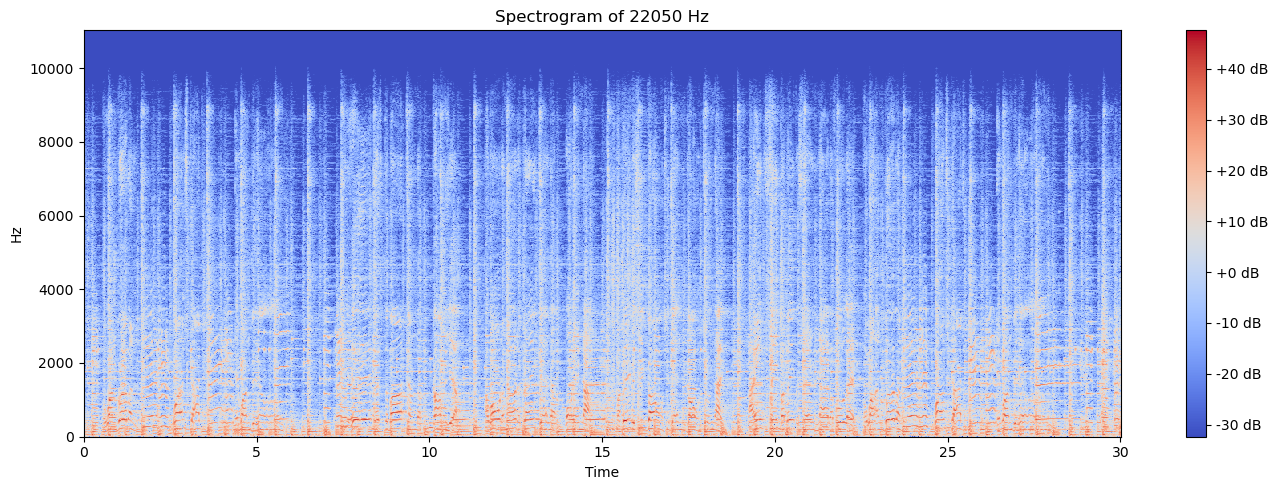

In [38]:
data, sr = librosa.load(data_path)

# spectrogram of audio
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14, 5))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Spectrogram of {sr} Hz')
plt.tight_layout()
plt.show()

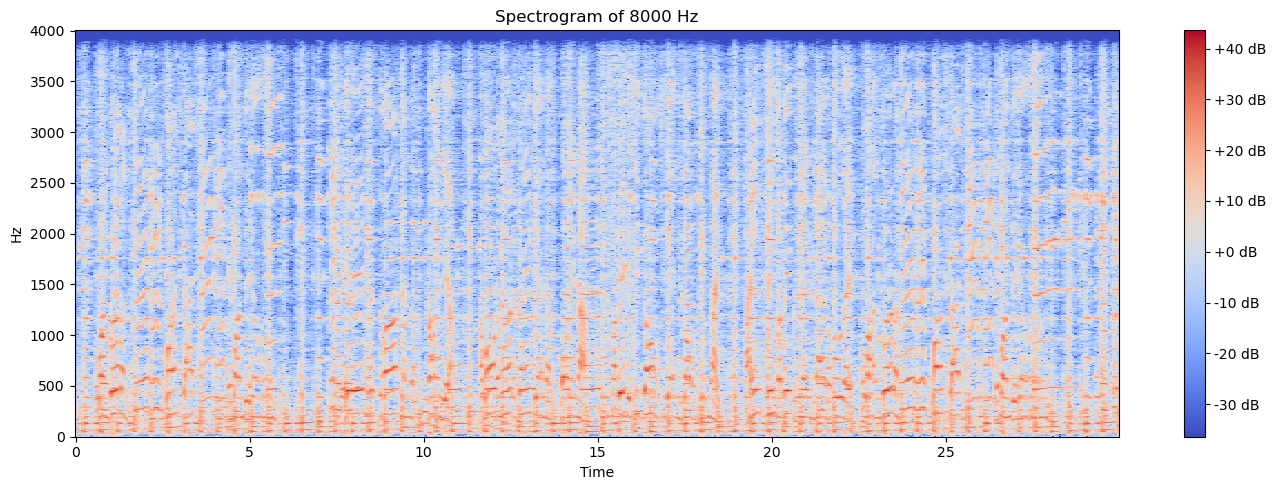

In [39]:
data, sr = librosa.load(data_path, sr=8000)

# spectrogram of audio
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14, 5))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Spectrogram of {sr} Hz')
plt.tight_layout()
plt.show()

### Mel-Spectrogram: Similar to a spectrogram but uses the Mel scale, which approximates human hearing, emphasizing frequencies that humans are more sensitive to

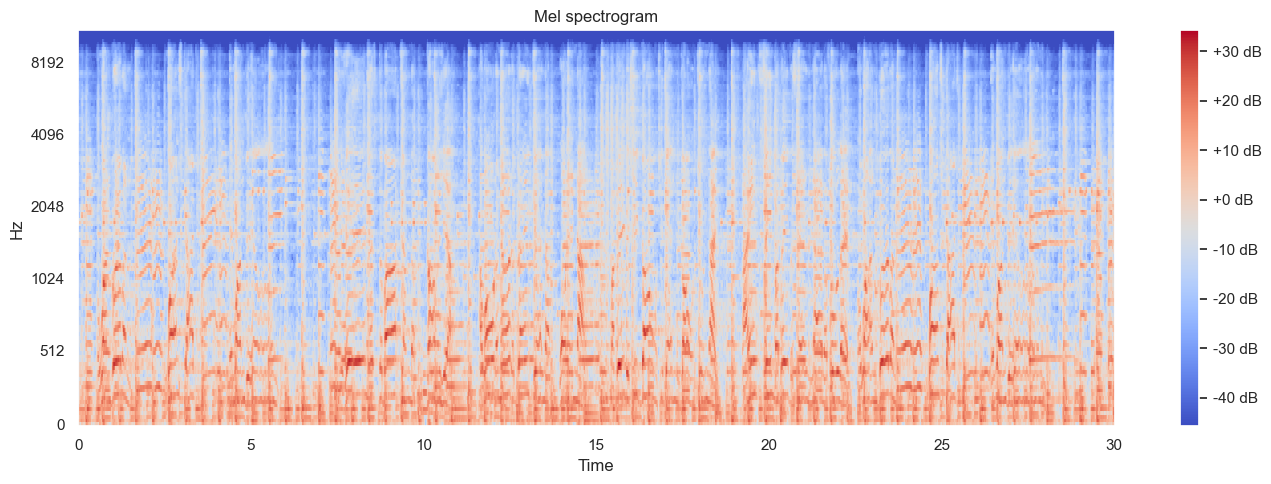

In [83]:
import numpy as np
data, sr = librosa.load(data_path)

# Mel spectrogram
S = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128, fmax=sr//2)
plt.figure(figsize=(14, 5))
librosa.display.specshow(librosa.power_to_db(S), y_axis='mel', fmax=sr/2, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

### RMS-E (Root Mean Square Energy): Measures the perceived loudness of the audio signal.

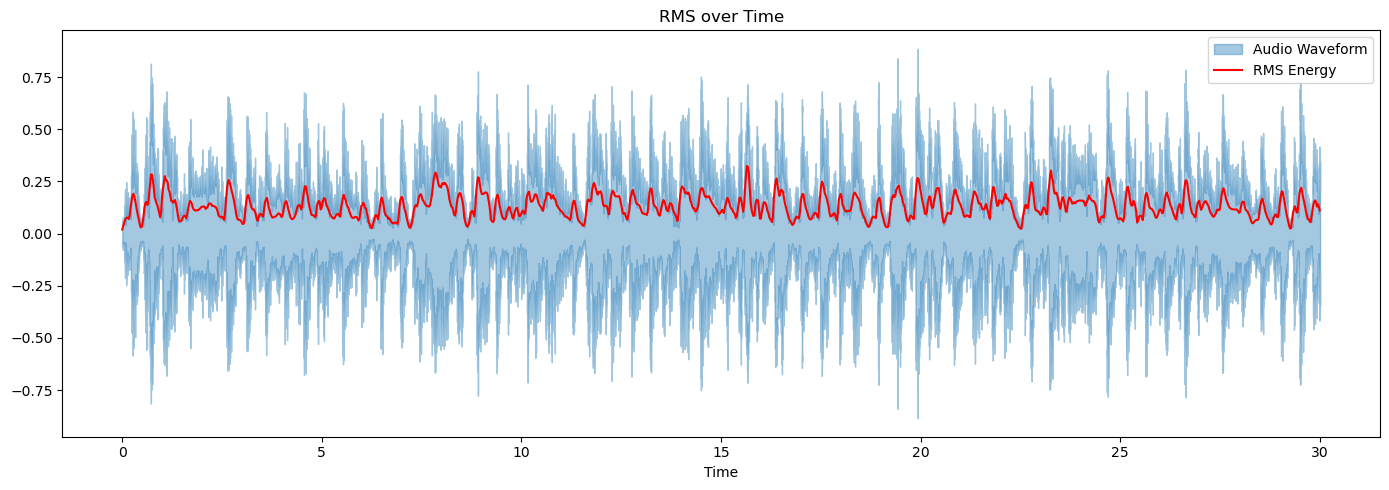

In [47]:
data, sr = librosa.load(data_path)

# compute rms
rms = librosa.feature.rms(y=data)

# plot rms
plt.figure(figsize=(14, 5))
librosa.display.waveshow(data, alpha=.4, label='Audio Waveform')
plt.plot(librosa.times_like(rms[0], sr=sr), rms[0], color='r', label='RMS Energy')
plt.legend()
plt.title('RMS over Time')
plt.tight_layout()
plt.show()

### Zero-Crossing Rate (ZCR): Counts how often the signal crosses the zero amplitude line, useful for distinguishing between different types of sounds

In [ ]:
# Let load wav file with default sampling rate of 22,050Hz
data, sr = librosa. load (data_path)
# Calculate ZRC of the first 1000 data point of our song
n0 = 0
n1 = 1000
plt.figure(figsize=(14, 5))
plt.plot(data [n0:n1])
plt.grid()
zero_crossings = librosa.zero_crossings(data[n0:1], pad=False)
print(f'ZRC = {sum(zero_crossings)}')

### Spectral Roll-Off: Describes the point where a specified percentage of the signal's power is below a particular frequency, giving insight into the **distribution of frequencies**

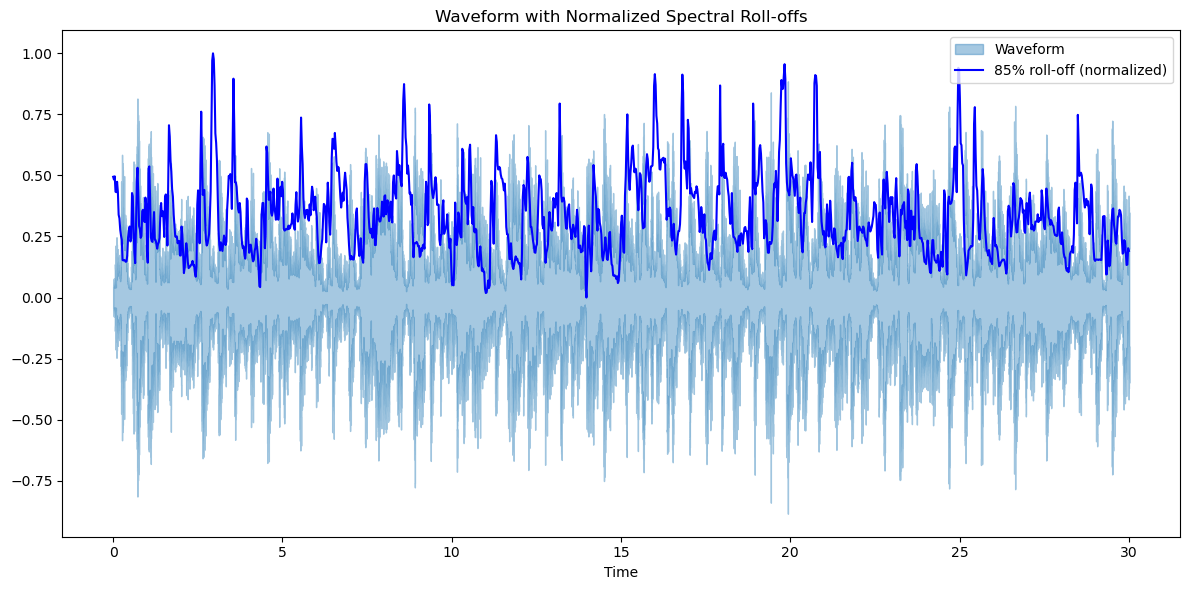

In [49]:
import sklearn.preprocessing

# Function to normalize an array
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

# Load the audio file with default sampling rate of 22,050Hz
data, sr = librosa.load(data_path)

# Compute and norm the spectral roll-off
rolloff_85 = librosa.feature.spectral_rolloff(y=data, sr=sr, roll_percent=0.85)[0]
rolloff_85_norm = normalize(rolloff_85)

# Plot the waveform and normalized spectral roll-offs
plt.figure(figsize=(12, 6))
librosa.display.waveshow(data, sr=sr, alpha=0.4, label='Waveform')
times = librosa.times_like(rolloff_85)
plt.plot(times, rolloff_85_norm, color='b', label='85% roll-off (normalized)')

plt.title('Waveform with Normalized Spectral Roll-offs')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


### Spectral Centroid: Indicates the "brightness" of a sound, showing where the center of mass for the sound spectrum lies

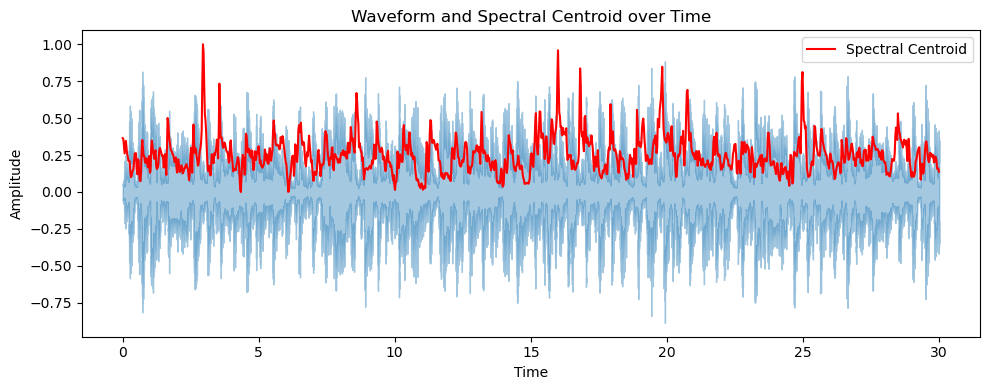

In [50]:
# Load the audio file with default sampling rate of 22,050Hz
data, sr = librosa.load(data_path)

# Compute the spectral centroid
spectral_centroids = librosa.feature.spectral_centroid(y=data, sr=sr)

# Plotting
plt.figure(figsize=(10, 4))
librosa.display.waveshow(data, sr=sr, alpha=0.4)
frames = range(len(spectral_centroids[0]))
t = librosa.frames_to_time(frames)
plt.plot(t, normalize(spectral_centroids[0]), color='r', label='Spectral Centroid')

plt.title('Waveform and Spectral Centroid over Time')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


### Spectral bandwidth: measures how spread out the frequencies are within a sound

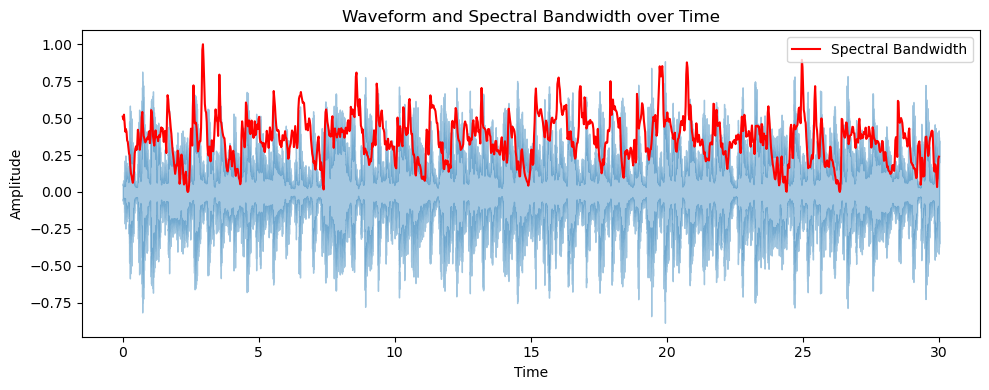

In [51]:
# Load .wav file with default sampling rate of 22,050Hz
data, sr = librosa.load(data_path)

# Compute the spectral bandwidth
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=data, sr=sr)

# Plotting
plt.figure(figsize=(10, 4))
librosa.display.waveshow(data, sr=sr, alpha=0.4)
frames = range(len(spectral_bandwidth[0]))
t = librosa.frames_to_time(frames)
plt.plot(t, normalize(spectral_bandwidth[0]), color='r', label='Spectral Bandwidth')

# Set labels and title
plt.title('Waveform and Spectral Bandwidth over Time')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


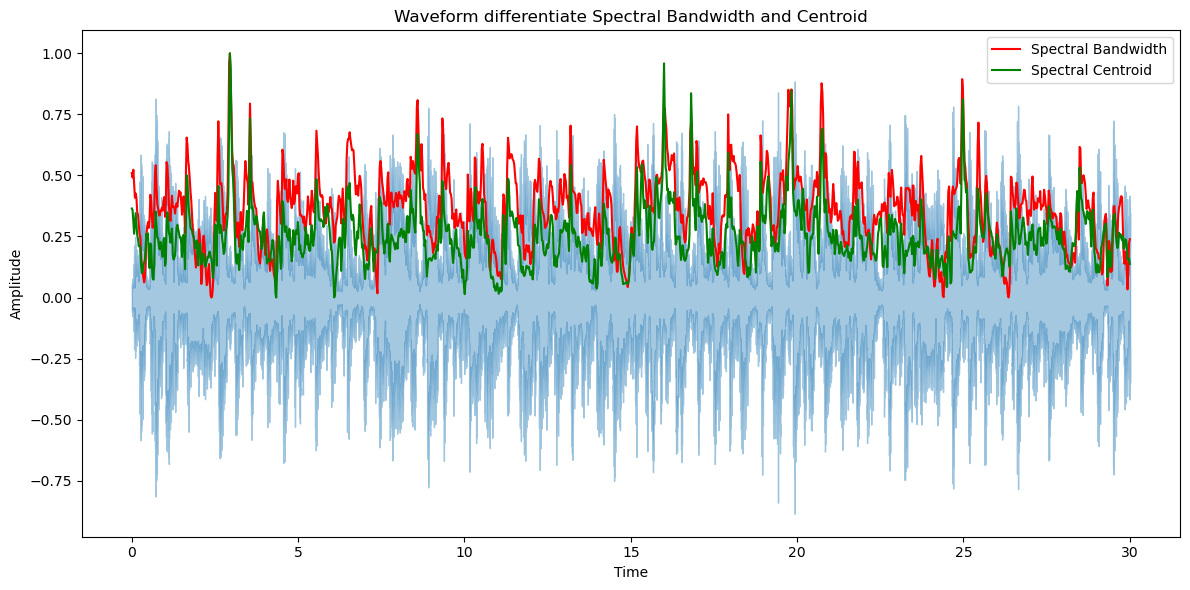

In [53]:
import librosa
import matplotlib.pyplot as plt
import sklearn.preprocessing

# Function to normalize an array
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

# Load the audio file with the default sampling rate of 22,050Hz
data, sr = librosa.load(data_path)

# Compute the spectral bandwidth and spectral centroid
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=data, sr=sr)
spectral_centroids = librosa.feature.spectral_centroid(y=data, sr=sr)

# Plotting
plt.figure(figsize=(12, 6))

# Plot the waveform
librosa.display.waveshow(data, sr=sr, alpha=0.4)

# Time frames for both features
frames = range(len(spectral_bandwidth[0]))
t = librosa.frames_to_time(frames)

# Plot spectral bandwidth (normalized)
plt.plot(t, normalize(spectral_bandwidth[0]), color='r', label='Spectral Bandwidth')

# Plot spectral centroid (normalized)
plt.plot(t, normalize(spectral_centroids[0]), color='g', label='Spectral Centroid')

# Set labels and title
plt.title('Waveform differentiate Spectral Bandwidth and Centroid')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()


### Chroma: represent energy distribution across 12 distinct pitch classes within octave

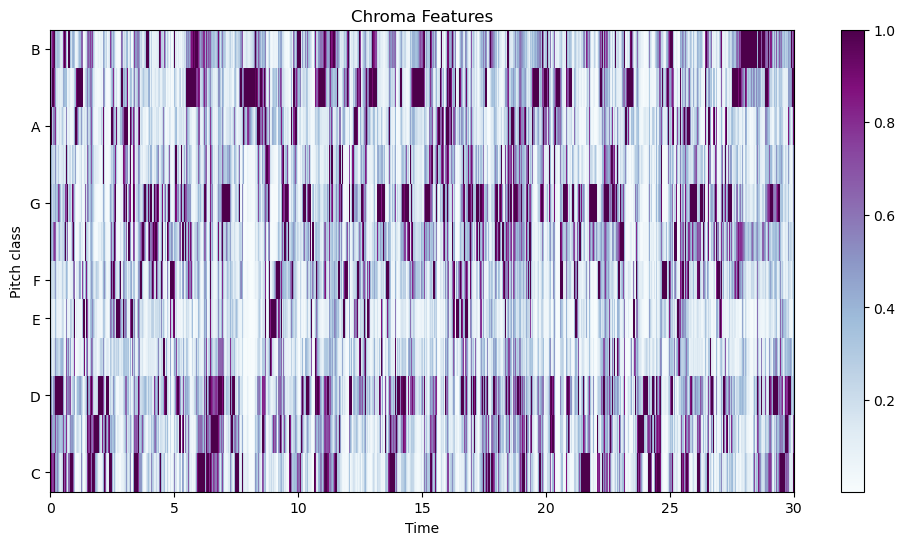

In [54]:
# Let load .wav file with default sampling rate of 22,050Hz
data, sr = librosa.load(data_path)

# Compute the Chroma features
chroma = librosa.feature.chroma_stft(y=data, sr=sr)

# Plotting
plt.figure(figsize=(12, 6))
librosa.display.specshow(chroma, sr=sr, x_axis="time", y_axis="chroma", cmap="BuPu")
plt.colorbar()
plt.title("Chroma Features")
plt.show()


### Harmonic/Percussive Source Separation (HPSS): Separates harmonic components (e.g., melodies) from percussive components (e.g., drum beats)

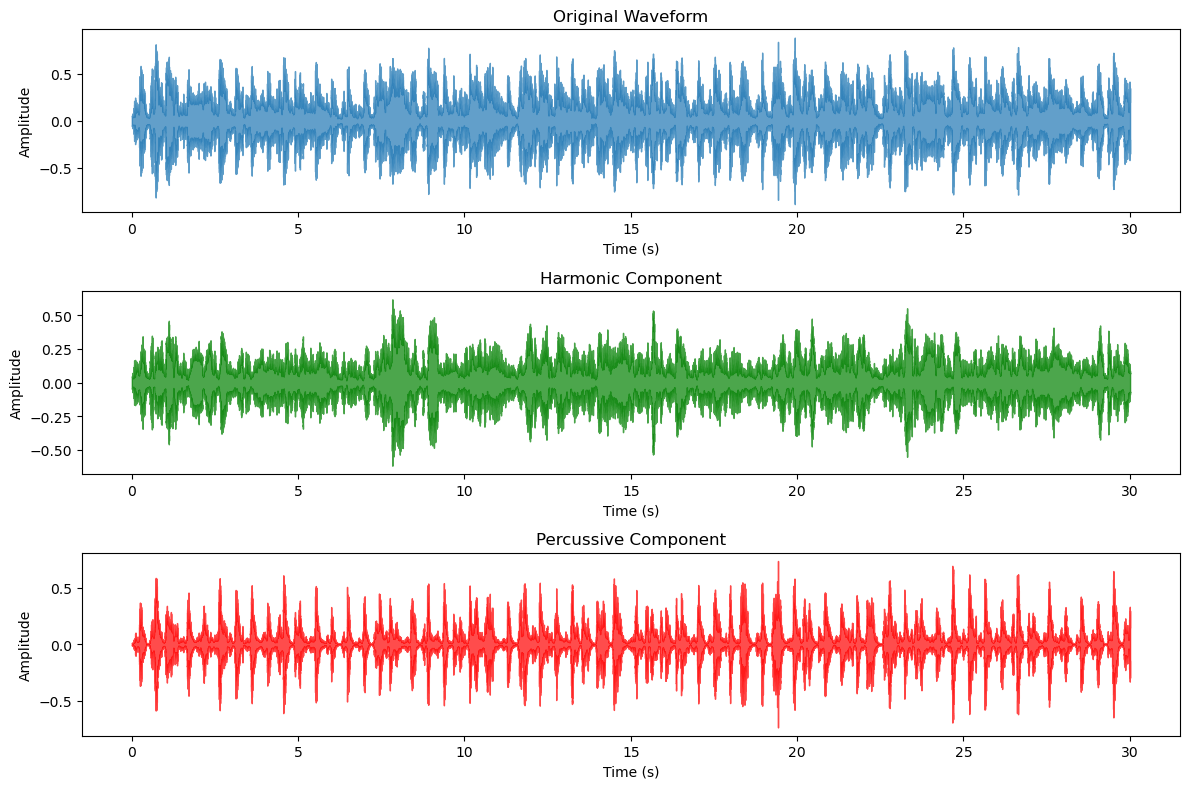

In [55]:
# Load .wav file with default sampling rate of 22,050Hz
data, sr = librosa.load(data_path)

# Separate the harmonic and percussive components
data_harmonic, data_percussive = librosa.effects.hpss(data)

# Plot the original, harmonic, and percussive waveforms
plt.figure(figsize=(12, 8))

# Original waveform
plt.subplot(3, 1, 1)
librosa.display.waveshow(data, sr=sr, alpha=0.7)
plt.title('Original Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Harmonic component
plt.subplot(3, 1, 2)
librosa.display.waveshow(data_harmonic, sr=sr, alpha=0.7, color='g')
plt.title('Harmonic Component')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Percussive component
plt.subplot(3, 1, 3)
librosa.display.waveshow(data_percussive, sr=sr, alpha=0.7, color='r')
plt.title('Percussive Component')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


### MFCCs (Mel Frequency Cepstral Coefficients): These are coefficients that represent the short-term power spectrum of a sound and are widely used in speech and music classification

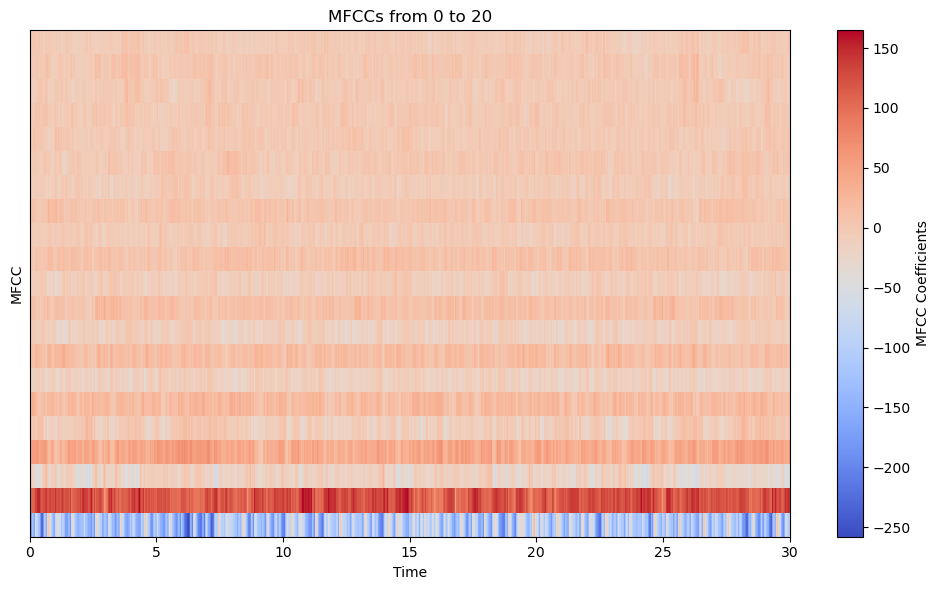

In [56]:
# Let load .wav file with default sampling rate of 22,050Hz
data, sr = librosa.load(data_path)

# Compute the MFCCs
mfccs = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=21)  # Compute 21 MFCCs to include 0 to 20

# Visualize the MFCCs
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar(label='MFCC Coefficients')
plt.ylabel('MFCC')
plt.title('MFCCs from 0 to 20')
plt.tight_layout()
plt.show()


## Music Genre Classification

In [57]:
# setup and dictionary initialization
from glob import glob
import pandas as pd

num_segment = 10
num_mfcc = 20
sample_rate = 22050
n_fft = 2048
hop_length = 512

my_csv = {
    "filename": [], "chroma_stft_mean": [], "chroma_stft_var": [],
    "rms_mean": [], "rms_var": [], "spectral_centroid_mean": [], "spectral_centroid_var": [],
    "spectral_bandwidth_mean": [], "spectral_bandwidth_var": [], "rolloff_mean": [],
    "rolloff_var": [], "zero_crossing_rate_mean": [], "zero_crossing_rate_var": [],
    "harmony_mean": [], "harmony_var": [], "perceptr_mean": [], "perceptr_var": [], 
    "tempo": [], "mfcc1_mean": [], "mfcc1_var": [], "mfcc2_mean": [], "mfcc2_var": [],
    "mfcc3_mean": [], "mfcc3_var": [], "mfcc4_mean": [], "mfcc4_var": [], "mfcc5_mean": [],
    "mfcc5_var": [], "mfcc6_mean": [], "mfcc6_var": [], "mfcc7_mean": [], "mfcc7_var": [],
    "mfcc8_mean": [], "mfcc8_var": [], "mfcc9_mean": [], "mfcc9_var": [], "mfcc10_mean": [],
    "mfcc10_var": [], "mfcc11_mean": [], "mfcc11_var": [], "mfcc12_mean": [], "mfcc12_var": [],
    "mfcc13_mean": [], "mfcc13_var": [], "mfcc14_mean": [], "mfcc14_var": [], "mfcc15_mean": [],
    "mfcc15_var": [], "mfcc16_mean": [], "mfcc16_var": [], "mfcc17_mean": [], "mfcc17_var": [],
    "mfcc18_mean": [], "mfcc18_var": [], "mfcc19_mean": [], "mfcc19_var": [], "mfcc20_mean": [],
    "mfcc20_var": [], "label": []
}

In [58]:
# Loop for feature extraction from audio files
dataset_path = 'GTZAN/genres_original'
audio_files = glob(dataset_path + "/*/*")
samples_per_segment = int(sample_rate * 30 / num_segment)

genre = ""

for f in sorted(audio_files):
    if genre != f.split('/')[-2]:
        genre = f.split('/')[-2]
        print(f"Processing {genre}...")

    fname = f.split('/')[-1]
    try:
        y, sr = librosa.load(f, sr=sample_rate)
    except:
        continue

    for n in range(num_segment):
        y_seg = y[samples_per_segment * n: samples_per_segment * (n+1)]

        # Chromagram
        chroma_hop_length = 512
        chromagram = librosa.feature.chroma_stft(y=y_seg, sr=sample_rate, hop_length=chroma_hop_length)
        my_csv["chroma_stft_mean"].append(chromagram.mean())
        my_csv["chroma_stft_var"].append(chromagram.var())

        # Root Mean Square Energy (RMS)
        RMSEn = librosa.feature.rms(y=y_seg)
        my_csv["rms_mean"].append(RMSEn.mean())
        my_csv["rms_var"].append(RMSEn.var())

        # Spectral Centroid
        spec_cent = librosa.feature.spectral_centroid(y=y_seg)
        my_csv["spectral_centroid_mean"].append(spec_cent.mean())
        my_csv["spectral_centroid_var"].append(spec_cent.var())

        # Spectral Bandwidth
        spec_band = librosa.feature.spectral_bandwidth(y=y_seg, sr=sample_rate)
        my_csv["spectral_bandwidth_mean"].append(spec_band.mean())
        my_csv["spectral_bandwidth_var"].append(spec_band.var())

        # Rolloff
        spec_roll = librosa.feature.spectral_rolloff(y=y_seg, sr=sample_rate)
        my_csv["rolloff_mean"].append(spec_roll.mean())
        my_csv["rolloff_var"].append(spec_roll.var())

        # Zero Crossing Rate
        zero_crossing = librosa.feature.zero_crossing_rate(y=y_seg)
        my_csv["zero_crossing_rate_mean"].append(zero_crossing.mean())
        my_csv["zero_crossing_rate_var"].append(zero_crossing.var())

        # Harmonics and Percussive
        harmony, perceptr = librosa.effects.hpss(y=y_seg)
        my_csv["harmony_mean"].append(harmony.mean())
        my_csv["harmony_var"].append(harmony.var())
        my_csv["perceptr_mean"].append(perceptr.mean())
        my_csv["perceptr_var"].append(perceptr.var())

        # Tempo
        tempo, _ = librosa.beat.beat_track(y=y_seg, sr=sample_rate)
        my_csv["tempo"].append(tempo)

        # MFCC
        mfcc = librosa.feature.mfcc(y=y_seg, sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
        mfcc = mfcc.T

        fseg_name = '.'.join(fname.split('.')[:2]) + f'.{n}.wav'
        my_csv["filename"].append(fseg_name)
        my_csv["label"].append(genre)

        for x in range(20):
            feat1 = "mfcc" + str(x + 1) + "_mean"
            feat2 = "mfcc" + str(x + 1) + "_var"
            my_csv[feat1].append(mfcc[:, x].mean())
            my_csv[feat2].append(mfcc[:, x].var())

        print(fname)


Processing blues...
blues.00000.wav
blues.00000.wav
blues.00000.wav
blues.00000.wav
blues.00000.wav
blues.00000.wav
blues.00000.wav
blues.00000.wav
blues.00000.wav
blues.00000.wav
blues.00001.wav
blues.00001.wav
blues.00001.wav
blues.00001.wav
blues.00001.wav
blues.00001.wav
blues.00001.wav
blues.00001.wav
blues.00001.wav
blues.00001.wav
blues.00002.wav
blues.00002.wav
blues.00002.wav
blues.00002.wav
blues.00002.wav
blues.00002.wav
blues.00002.wav
blues.00002.wav
blues.00002.wav
blues.00002.wav
blues.00003.wav
blues.00003.wav
blues.00003.wav
blues.00003.wav
blues.00003.wav
blues.00003.wav
blues.00003.wav
blues.00003.wav
blues.00003.wav
blues.00003.wav
blues.00004.wav
blues.00004.wav
blues.00004.wav
blues.00004.wav
blues.00004.wav
blues.00004.wav
blues.00004.wav
blues.00004.wav
blues.00004.wav
blues.00004.wav
blues.00005.wav
blues.00005.wav
blues.00005.wav
blues.00005.wav
blues.00005.wav
blues.00005.wav
blues.00005.wav
blues.00005.wav
blues.00005.wav
blues.00005.wav
blues.00006.wav
blue

/var/folders/pf/4hxrldrx2g7g5x19dwlvk36w0000gn/T/ipykernel_45605/269907279.py:14: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(f, sr=sample_rate)
/Users/binnu/miniforge3/envs/dl/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


jazz.00055.wav
jazz.00055.wav
jazz.00055.wav
jazz.00055.wav
jazz.00055.wav
jazz.00055.wav
jazz.00055.wav
jazz.00055.wav
jazz.00055.wav
jazz.00055.wav
jazz.00056.wav
jazz.00056.wav
jazz.00056.wav
jazz.00056.wav
jazz.00056.wav
jazz.00056.wav
jazz.00056.wav
jazz.00056.wav
jazz.00056.wav
jazz.00056.wav
jazz.00057.wav
jazz.00057.wav
jazz.00057.wav
jazz.00057.wav
jazz.00057.wav
jazz.00057.wav
jazz.00057.wav
jazz.00057.wav
jazz.00057.wav
jazz.00057.wav
jazz.00058.wav
jazz.00058.wav
jazz.00058.wav
jazz.00058.wav
jazz.00058.wav
jazz.00058.wav
jazz.00058.wav
jazz.00058.wav
jazz.00058.wav
jazz.00058.wav
jazz.00059.wav
jazz.00059.wav
jazz.00059.wav
jazz.00059.wav
jazz.00059.wav
jazz.00059.wav
jazz.00059.wav
jazz.00059.wav
jazz.00059.wav
jazz.00059.wav
jazz.00060.wav
jazz.00060.wav
jazz.00060.wav
jazz.00060.wav
jazz.00060.wav
jazz.00060.wav
jazz.00060.wav
jazz.00060.wav
jazz.00060.wav
jazz.00060.wav
jazz.00061.wav
jazz.00061.wav
jazz.00061.wav
jazz.00061.wav
jazz.00061.wav
jazz.00061.wav
jazz.00061

In [59]:
# Save features to csv file
df = pd.DataFrame(my_csv)
df.to_csv('GTZAN/features_3_sec.csv', index=False)

solve by using image slice 30s img into 3s and input into NN

### Exercise

1. Biểu đồ sóng (Waveform) biểu diễn điều gì trong âm thanh?
   - A. Biểu diễn tần số của âm thanh qua thời gian
   - B. Biểu diễn độ dài của tín hiệu âm thanh
   - **C. Biểu diễn sự biến đổi biên độ của sóng âm so với thời gian**
   - D. Biểu diễn sự va chạm của các hạt không khí khi tạo ra sóng âm

2. Vì sao tốc độ lấy mẫu là một tham số quan trọng?
   - A. Bởi vì nó biểu thị độ dài của tệp âm thanh
   - **B. Bởi vì nó quyết định số lượng mẫu được lấy mỗi giây từ tín hiệu liên tục, ảnh hưởng đến chất lượng tín hiệu số và kích thước dữ liệu**
   - C. Bởi vì nó giúp định dạng tệp âm thanh
   - D. Bởi vì nó ảnh hưởng đến tần số của âm thanh

3. Lợi ích chính của biểu đồ phổ so với biểu đồ sóng là gì?
   - **A. Nó cung cấp thông tin chi tiết về cách các tần số khác nhau phân phối theo thời gian**
   - B. Nó cho phép hiển thị cấu trúc thời gian của âm thanh
   - C. Nó giúp biểu diễn động lực thời gian và nhịp điệu của âm nhạc
   - D. Nó đại diện cho sự biến đổi biên độ của tín hiệu âm thanh theo thời gian

4. Điểm khác biệt chính giữa biểu đồ phổ và phổ Mel là gì?
   - A. Biểu đồ phổ cung cấp một biểu diễn trực quan về nội dung tần số của tín hiệu âm thanh theo thời gian, trong khi phổ Mel biểu diễn âm lượng của tín hiệu âm thanh theo thời gian
   - B. Phổ Mel chỉ được sử dụng cho phân tích giọng nói, trong khi biểu đồ phổ có thể được sử dụng cho bất kỳ tín hiệu âm thanh nào
   - C. Biểu đồ phổ cung cấp một biểu diễn bị méo của tín hiệu âm thanh, trong khi phổ Mel sửa chữa những méo này
   - **D. Phổ Mel nhấn mạnh các dải tần số quan trọng nhất cho việc nghe và hiểu của con người dựa trên thang Mel, trong khi biểu đồ phổ cung cấp biểu diễn tần số tuyến tính**

5. Trong ngữ cảnh xử lý âm thanh, tại sao RMS-E (Root Mean Square Energy) lại quan trọng?
   - A. RMS-E cho phép đo độ cao của âm thanh
   - B. RMS-E được sử dụng để phát hiện các đỉnh trong tín hiệu âm thanh
   - **C. RMS-E đo "âm lượng cảm nhận" và thường được sử dụng trong các thuật toán chuẩn hóa và nén âm thanh**
   - D. RMS-E được sử dụng để tối ưu hóa tốc độ lấy mẫu của tín hiệu âm thanh

6. Trong ngữ cảnh xử lý giọng nói, tần số cắt không (Zero-Crossing Rate) được sử dụng như thế nào?
   - A. Để đo độ to lớn của âm thanh
   - **B. Để phân biệt giữa các đoạn có âm hữu thanh và âm vô thanh**
   - C. Để nhận dạng các từ riêng biệt trong một câu
   - D. Để phân tích giai điệu của một bài hát 

7. Trong ngữ cảnh xử lý tín hiệu âm nhạc, Spectral roll-off được sử dụng để làm gì?
   - A. Để xác định tần số cơ bản của tín hiệu
   - B. Để đo độ lớn của âm thanh
   - **C. Để cung cấp thông tin về hình dạng phổ và phân biệt giữa các nhạc cụ và âm thanh có khác biệt về harmonics**
   - D. Để xác định tốc độ của tín hiệu âm thanh

8. Spectral centroid trong xử lý tín hiệu âm thanh thường liên quan đến yếu tố nào?
   - **A. "Sắc thái" hoặc timbre của âm thanh, chỉ ra mức độ "sáng" hay "sắc nét" của âm thanh**
   - B. Độ to lớn hoặc độ ồn của âm thanh
   - C. Tần số cơ bản của tín hiệu
   - D. Độ cao tương đối của âm thanh so với âm thanh khác

9. Đặc trưng Spectral bandwidth trong xử lý tín hiệu âm thanh thường mô tả yếu tố gì?
   - A. Tần số cơ bản của âm thanh
   - B. "Sắc thái" hoặc timbre của âm thanh
   - C. Tổng năng lượng phổ của âm thanh
   - **D. Độ rộng của phân phối tần số trong âm thanh**

10. Đặc trưng Chroma trong xử lý tín hiệu âm thanh thường được sử dụng để mô tả yếu tố gì trong âm nhạc?
    - A. Nhịp điệu và tốc độ của âm nhạc
    - **B. Nội dung hòa âm và hợp âm của âm nhạc**
    - C. Độ sáng hoặc tối của timbre trong âm nhạc
    - D. Tổng cường độ âm thanh

11. Tại sao việc tách thành phần Hài hòa và Gõ (HPSS) quan trọng trong MIR?
    - A. Để chỉnh sửa tín hiệu và làm cho nó nghe to hơn
    - B. Để thay đổi tần số của tín hiệu
    - **C. Để điều chỉnh nhịp điệu so với yếu tố giai điệu một cách độc lập và nghiên cứu chúng một cách riêng biệt**
    - D. Để làm giảm tiếng ồn từ tín hiệu âm nhạc

12. Trong bối cảnh nào MFCC thường được sử dụng nhiều nhất?
    - **A. Nhận dạng giọng nói và xác thực người dùng dựa trên đặc điểm giọng nói của họ**
    - B. Điều chỉnh độ lớn của âm thanh
    - C. Để điều chỉnh nhịp điệu so với yếu tố giai điệu một cách độc lập và nghiên cứu chúng một cách riêng biệt
    - D. Phát hiện nhiễu trong bản ghi âm


waveform: instantaneous amplitude change over time 
-> overall structure of sound, identify silence, sudden change in intensity

spectrogram: frequency spectrum of signal over time
-> understand energy distribution across freq over time

mel-spectrogram: frequency mapped into Mel scale, approximte to human hearing
-> auto music transcript, speech recognition

rms-e: average loudness measure of signal over time, smooth line 

Zero-crossing rate: number of time signal crosses zero amplitude axis 
-> detect noise, distinguish btw voice and unvoice sound

HPSS: separate audio signal into its harmonic and percussive components

mfcc is improvement for spectrogram in voice detection

solve sound(time series) using ml, computer vision, sliding windows
